 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [125]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [126]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv,index_col="Date", infer_datetime_format=True, parse_dates=True)

In [127]:
# Count nulls
whale_returns_df.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [128]:
# Drop nulls
whale_returns_df.dropna(inplace = True)

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [129]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv, index_col = 'Date',  infer_datetime_format =True, parse_dates = True )

In [130]:
# Count nulls
algo_returns_df.isnull().mean()*100

Algo 1    0.000000
Algo 2    0.483481
dtype: float64

In [131]:
# Drop nulls
algo_returns_df.dropna(inplace = True)

## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [132]:
# Reading S&P 500 Closing Prices, sorting index
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv, index_col = 'Date', infer_datetime_format = 'True', parse_dates = True)

In [133]:
# Check Data Types
sp500_history_df.dtypes

Close    object
dtype: object

In [134]:
# Fix Data Types and remove $ signs
sp500_history_df['Close'] = sp500_history_df['Close'].str.replace('$', '')
sp500_history_df['Close'] = sp500_history_df['Close'].astype('float')
# Price history needs to be sorted in ascending order. Otherwise returns would be the way around
sp500_history_df = sp500_history_df.sort_values(by = 'Date')

In [135]:
# Calculate Daily Returns
sp500_returns_df = sp500_history_df.pct_change()

In [136]:
# Drop nulls
sp500_returns_df.dropna(inplace = True)

In [137]:
# Rename Column and sort in ascending order
sp500_returns_df.columns = ['sp500']

##### 

## Combine Whale, Algorithmic, and S&P 500 Returns

In [138]:
# Concatenate all DataFrames into a single DataFrame
WASP_returns_df = pd.concat([whale_returns_df,algo_returns_df,sp500_returns_df], axis = 'columns', join = 'inner')
WASP_returns_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944
...,...,...,...,...,...,...,...
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. 

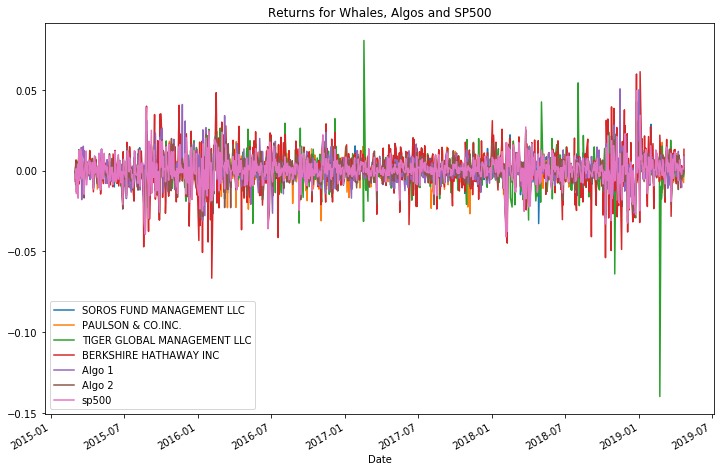

In [139]:
# Plot daily returns
WASP_returns_df.plot(figsize = (12,8), title = 'Returns for Whales, Algos and SP500')

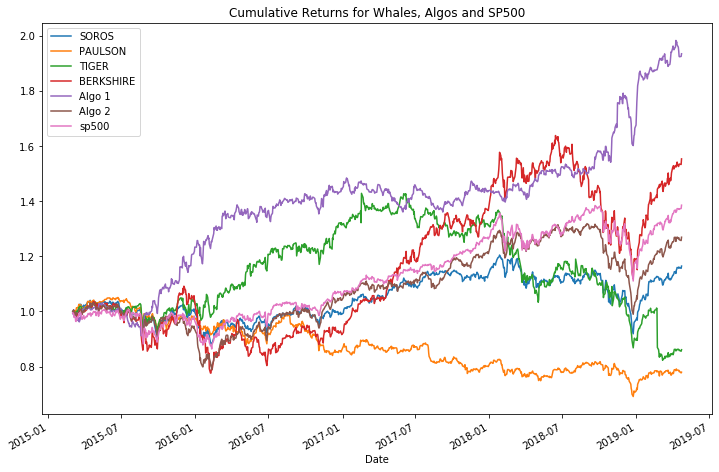

In [140]:
# Plot cumulative returns
WASP_cum_returns_df = (1+WASP_returns_df).cumprod()
WASP_cum_returns_df.columns = ['SOROS','PAULSON','TIGER', 'BERKSHIRE','Algo 1','Algo 2','sp500']
WASP_cum_returns_df.plot(figsize = (12,8), title = 'Cumulative Returns for Whales, Algos and SP500')

---

## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

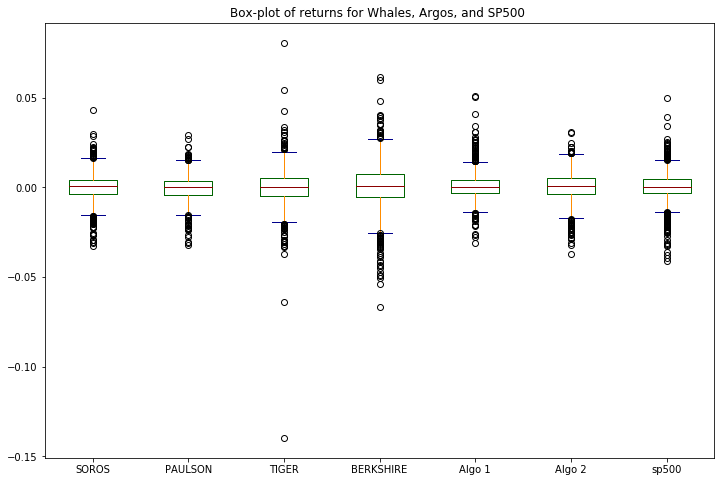

In [141]:
# Box plot to visually show risk
color =  {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange', 'medians': 'DarkRed', 'caps': 'DarkBlue'}
WASP_returns_df.columns = ['SOROS','PAULSON','TIGER', 'BERKSHIRE','Algo 1','Algo 2','sp500']
WASP_returns_df.plot.box(figsize = (12,8), title = 'Box-plot of returns for Whales, Argos, and SP500 ' , color = color)

In [142]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
WASP_returns_df.std()

SOROS        0.007895
PAULSON      0.007023
TIGER        0.010894
BERKSHIRE    0.012919
Algo 1       0.007620
Algo 2       0.008342
sp500        0.008554
dtype: float64

In [143]:
# Determine which portfolios are riskier than the S&P 500

Berkshire Hathaway INC and Tiger Global Management LLC had a higher s.d. than the S&P500

In [144]:
# Calculate the annualized standard deviation (252 trading days)
WASP_sd_ann_df = WASP_returns_df.std() * np.sqrt(252)
WASP_sd_ann_df

SOROS        0.125335
PAULSON      0.111488
TIGER        0.172936
BERKSHIRE    0.205077
Algo 1       0.120967
Algo 2       0.132430
sp500        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
2. Calculate and plot a 60 day Beta for Berkshire Hathaway Inc compared to the S&&P 500

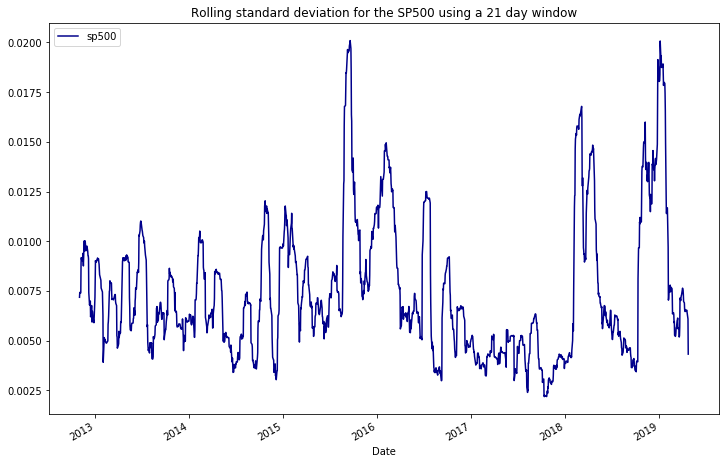

In [145]:
# Calculate and plot the rolling standard deviation for the S&P500 using a 21 day window
title = 'Rolling standard deviation for the SP500 using a 21 day window'
color = 'DarkBLue'
sp500_returns_std21_df = sp500_returns_df.rolling(window = 21).std().plot(figsize = (12,8),title = title,color = color)

In [146]:
# Correlation
WASP_corr = WASP_returns_df.corr()
WASP_corr

,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,sp500
SOROS,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
sp500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


All portfolios are correlated to the sp500. Algo 1 is the less correlated (27%) and Algo2 has the highest correlation (86%)

In [147]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

# first we compute the rolling covariance between BERKSHIRE and sp500
rollingBerkShire_cov = WASP_returns_df['BERKSHIRE'].rolling(window = 60).cov(WASP_returns_df['sp500'])

# then we compute the rolling variance for the sp500
rolling_sp500_var = WASP_returns_df['sp500'].rolling(window = 60).var()

# finally compute Beta
rolling_Beta_BerkShire = rollingBerkShire_cov / rolling_sp500_var
rolling_Beta_BerkShire

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-16    1.337986
2019-04-17    1.301791
2019-04-18    1.302226
2019-04-22    1.304125
2019-04-23    1.278284
Length: 1043, dtype: float64

### Challenge: Exponentially Weighted Average 

An alternative way to calculate a rollwing window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the `ewm` with a 21 day half-life.

In [148]:
# (OPTIONAL) 

# Specify decay in terms of half-life, α=1−exp(log(0.5)/halflife),forhalflife>0
# We are told to use halflife = 21
# I prefer to use alpha than halflife directly. 
# It gives me more insight on what it's going on
alpha = 1 - np.exp(np.log(0.5)/21)
BerkShire_returns_df_exp = WASP_returns_df.ewm(alpha = alpha)['BERKSHIRE']

# first we compute the exponentially weighted cov between BERKSHIRE and sp500
rollingBerkShire_cov_exp = BerkShire_returns_df_exp.cov(WASP_returns_df['sp500'])

# then we compute the exp. weighted variance for the sp500
sp500_returns_df_exp = WASP_returns_df.ewm(alpha = alpha)['sp500']
rolling_sp500_var_exp = sp500_returns_df_exp.var()

# finally compute Beta
rolling_Beta_BerkShire_exp = rollingBerkShire_cov_exp / rolling_sp500_var_exp
rolling_Beta_BerkShire_exp

Date
2015-03-03          NaN
2015-03-04    71.828629
2015-03-05     1.417128
2015-03-06     1.287095
2015-03-09     0.823068
                ...    
2019-04-16     1.298056
2019-04-17     1.286316
2019-04-18     1.286233
2019-04-22     1.286592
2019-04-23     1.293897
Length: 1043, dtype: float64

---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

Calculate and plot the annualized Sharpe ratios for all portfolios to determine which portfolio has the best performance

In [149]:
# Annualzied Sharpe Ratios

# We'll use historical s.d. as volatility measure. 
# This was computed in the sections "Risk" above. 
WASP_sd_ann_df

# For returns we'll use the annualized cumulative returns from 2015 to 2019. 
# We assume risk free rate is 0
# We use this equality: (1 + annual_return)^(Total_Days / 365) = cumulative_returns
# We need the total number of days in the sample
from datetime import datetime
date_format = "%Y-%m-%d"
a = datetime.strptime('2015-03-03', date_format)
b = datetime.strptime('2019-04-23', date_format)

# Then we solve for annual_return
WASP_returns_annual = (WASP_cum_returns_df)**(365/(b -a).days) - 1
WASP_returns_annual = WASP_returns_annual.loc['2019-04-23']
WASP_returns_annual

SOROS        0.037462
PAULSON     -0.058319
TIGER       -0.035432
BERKSHIRE    0.112183
Algo 1       0.172705
Algo 2       0.059245
sp500        0.081896
Name: 2019-04-23 00:00:00, dtype: float64

In [150]:
# Now we can compute Sharpe Ratios
WASP_Sharpe_df = WASP_returns_annual / WASP_sd_ann_df
WASP_Sharpe_df

SOROS        0.298897
PAULSON     -0.523096
TIGER       -0.204887
BERKSHIRE    0.547030
Algo 1       1.427701
Algo 2       0.447367
sp500        0.603122
dtype: float64

 plot() these sharpe ratios using a barplot.
 On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales?

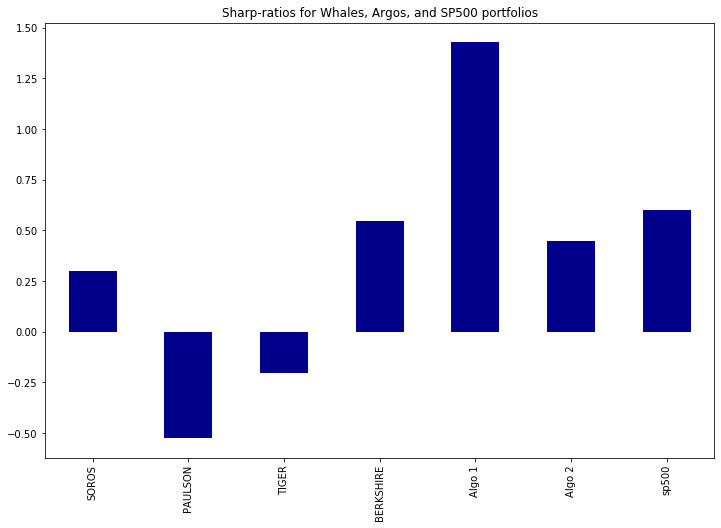

In [151]:
# Visualize the sharpe ratios as a bar plot
WASP_Sharpe_df.plot(kind = 'bar', figsize = (12,8), title = 'Sharp-ratios for Whales, Argos, and SP500 portfolios', color = 'DarkBlue')

---

**Algo 1 had the best Sharpe-ratio followed by the SP500. Algo 2 was in fourth place also behind Berkshire. Paulson was the worst with a negative annualized Sharpe-ratio**

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

I selected these 5 stocks for my porfolio:
1. Cogate-Palmolive (CL)
2. Facebook (FB)
3. JP Morgan (JPM)
4. Pfizer (PFE)
5. Tesla (TSLA)

In [152]:
# Read the first stock
csv_colgate = Path('../Stocks/Colgate.csv')
colgate_df = pd.read_csv(csv_colgate,index_col="Date", infer_datetime_format=True, parse_dates=True)
colgate_returns_df = colgate_df.pct_change()

In [153]:
# Read the second stock
csv_facebook = Path('../Stocks/Facebook.csv')
facebook_df = pd.read_csv(csv_facebook,index_col="Date", infer_datetime_format=True, parse_dates=True)
facebook_returns_df = facebook_df.pct_change()

In [154]:
# Read the third stock
csv_jpm = Path('../Stocks/JPM.csv')
jpm_df = pd.read_csv(csv_jpm,index_col="Date", infer_datetime_format=True, parse_dates=True)
jpm_returns_df = jpm_df.pct_change()

In [155]:
# Read the fourth stock
csv_pfizer = Path('../Stocks/Pfizer.csv')
pfizer_df = pd.read_csv(csv_pfizer,index_col="Date", infer_datetime_format=True, parse_dates=True)
pfizer_returns_df = pfizer_df.pct_change()

In [156]:
# Read the fith stock
csv_tesla = Path('../Stocks/Tesla.csv')
tesla_df = pd.read_csv(csv_tesla,index_col="Date", infer_datetime_format=True, parse_dates=True)
tesla_returns_df = tesla_df.pct_change()

In [157]:
# Concatenate all stocks into a single DataFrame
stocks_returns_df = pd.concat(
    [colgate_returns_df, facebook_returns_df, jpm_returns_df, pfizer_returns_df, tesla_returns_df], axis ='columns' , join = "inner"
)

In [158]:
# Reset the index
stocks_returns_df.columns = ['Colgate', 'Facebook','JPM', 'Pfizer','Tesla']

In [159]:
# Drop Nulls
stocks_returns_df.dropna(inplace = True)

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [160]:
# Calculate weighted portfolio returns
weights = [1/5, 1/5, 1/5, 1/5, 1/5]
stocks_portfolio_df = stocks_returns_df.dot(weights)
stocks_portfolio_df

Date
2015-03-04    0.007132
2015-03-05   -0.000215
2015-03-06   -0.022351
2015-03-09   -0.001181
2015-03-10   -0.015243
                ...   
2019-04-16    0.001884
2019-04-17   -0.002024
2019-04-18   -0.001089
2019-04-22   -0.005211
2019-04-23    0.004263
Length: 1042, dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [161]:
all_portfolio_df = pd.concat([stocks_portfolio_df, WASP_returns_df], axis = 'columns', join = 'inner')
all_portfolio_df.columns = ['Portfolio','SOROS','PAULSON','TIGER', 'BERKSHIRE','Algo 1','Algo 2','sp500']
all_portfolio_df.head(3)

,Portfolio,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,sp500
Date,,,,,,,,
2015-03-04,0.007132,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,-0.000215,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.022351,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174


In [162]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolio_df.dropna(inplace  = True)

## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [163]:
# Risk
all_portfolio_df.std()

Portfolio    0.010659
SOROS        0.007899
PAULSON      0.007025
TIGER        0.010899
BERKSHIRE    0.012923
Algo 1       0.007623
Algo 2       0.008346
sp500        0.008556
dtype: float64

In [164]:
# annualized standard deviation
all_portfolio_asd = all_portfolio_df.std() * np.sqrt(252)
all_portfolio_asd

Portfolio    0.169213
SOROS        0.125393
PAULSON      0.111517
TIGER        0.173019
BERKSHIRE    0.205146
Algo 1       0.121018
Algo 2       0.132492
sp500        0.135830
dtype: float64

In [165]:
# Rolling
# YOUR CODE HERE

In [166]:
# Beta
# Calculate Beta for a single portfolio compared to the total market (S&P 500)

# first we compute the rolling covariance between Portfolio and sp500
rolling_portfolio_cov = all_portfolio_df['Portfolio'].rolling(window = 60).cov(all_portfolio_df['sp500'])

# then we compute the rolling variance for the sp500
rolling_sp500_var = all_portfolio_df['sp500'].rolling(window = 60).var()

# finally compute Beta
rolling_Beta_portfolio = rolling_portfolio_cov / rolling_sp500_var
rolling_Beta_portfolio

Date
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
2015-03-10         NaN
                ...   
2019-04-16    0.893746
2019-04-17    0.895883
2019-04-18    0.899231
2019-04-22    0.900585
2019-04-23    0.891333
Length: 1042, dtype: float64

In [167]:
# Annualzied Sharpe Ratios
# We'll use historical s.d. as volatility measure. 
# This was computed in the sections "Risk" above. 
all_portfolio_asd

# For returns we'll use the annualized cumulative returns from 2015 to 2019. 
# We assume risk free rate is 0
# We use this equality: (1 + annual_return)^(Total_Days / 365) = cumulative_returns
# We need the total number of days in the sample
from datetime import datetime
date_format = "%Y-%m-%d"
a = datetime.strptime('2015-03-03', date_format)
b = datetime.strptime('2019-04-23', date_format)

# We need cumulative returns
all_cum_returns_df = ( 1 + all_portfolio_df).cumprod()

# Then we solve for annual_return
all_returns_annual = (all_cum_returns_df)**(365/(b -a).days) - 1
all_returns_annual = all_returns_annual.loc['2019-04-23']
all_returns_annual

Portfolio    0.119351
SOROS        0.037779
PAULSON     -0.057183
TIGER       -0.035317
BERKSHIRE    0.113954
Algo 1       0.173255
Algo 2       0.059488
sp500        0.083084
Name: 2019-04-23 00:00:00, dtype: float64

In [168]:
# Now we can compute Sharpe Ratios
all_Sharpe_df = all_returns_annual / all_portfolio_asd
all_Sharpe_df

Portfolio    0.705332
SOROS        0.301287
PAULSON     -0.512776
TIGER       -0.204122
BERKSHIRE    0.555478
Algo 1       1.431645
Algo 2       0.448991
sp500        0.611679
dtype: float64

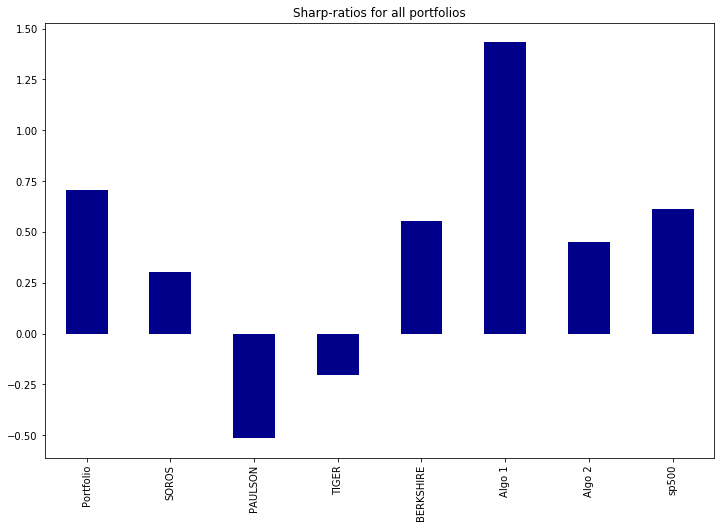

In [169]:
# Visualize the sharpe ratios as a bar plot
all_Sharpe_df.plot(kind = 'bar', figsize = (12,8), color  = "DarkBlue"
            ,title = 'Sharp-ratios for all portfolios'
)

## Include correlation analysis to determine which stocks (if any) are correlated

In [170]:
all_correlations = all_portfolio_df.corr()
all_correlations

,Portfolio,SOROS,PAULSON,TIGER,BERKSHIRE,Algo 1,Algo 2,sp500
Portfolio,1.000000,0.683614,0.546432,0.519894,0.658200,0.240355,0.678589,0.804796
SOROS,0.683614,1.000000,0.699961,0.561246,0.754385,0.321175,0.826869,0.837908
PAULSON,0.546432,0.699961,1.000000,0.434551,0.545465,0.268692,0.678214,0.669612
TIGER,0.519894,0.561246,0.434551,1.000000,0.424465,0.164384,0.507414,0.624023
BERKSHIRE,0.658200,0.754385,0.545465,0.424465,1.000000,0.291912,0.688112,0.751297
Algo 1,0.240355,0.321175,0.268692,0.164384,0.291912,1.000000,0.288214,0.279366
Algo 2,0.678589,0.826869,0.678214,0.507414,0.688112,0.288214,1.000000,0.858828
sp500,0.804796,0.837908,0.669612,0.624023,0.751297,0.279366,0.858828,1.000000


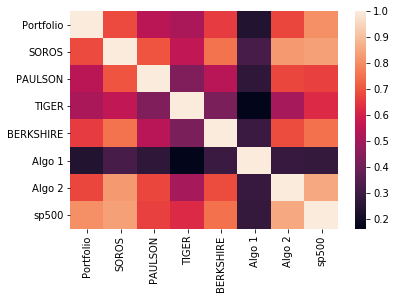

In [171]:
# Create a heatmap from the correlation values
import seaborn as sns
sns.heatmap(all_correlations)

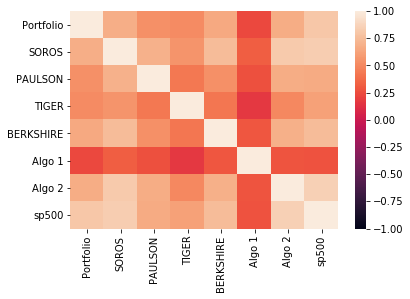

In [172]:
# Create a heatmap from the correlation values and adjust the scale
sns.heatmap(all_correlations, vmin=-1, vmax=1)

In [173]:
# correlations of stocks composing Portfolio
stocks_returns_df.corr()

,Colgate,Facebook,JPM,Pfizer,Tesla
Colgate,1.000000,0.215745,0.272624,0.282737,0.138533
Facebook,0.215745,1.000000,0.326260,0.265716,0.290158
JPM,0.272624,0.326260,1.000000,0.423744,0.227620
Pfizer,0.282737,0.265716,0.423744,1.000000,0.196574
Tesla,0.138533,0.290158,0.227620,0.196574,1.000000


# Analysis of Results

- My portfolio was composed of 5 stocks, all equally weighted:

1. Cogate-Palmolive (CL)
2. Facebook (FB)
3. P Morgan (JPM)
4. Pfizer (PFE)
5. Tesla (TSLA)

- In terms of risk, the asset with lowest annualized s.d. was Paulson followed by Algo_1. My portfolio was in the middle of the table with 16.9% volatility:

    1. PAULSON:      0.111517
    2. Algo 1:       0.121018
    3. SOROS:        0.125393
    4. Algo 2:       0.132492
    5. sp500:        0.135830
    6. Portfolio:    0.169213
    7. TIGER:        0.173019
    8. BERKSHIRE:    0.205146


- The beta of Berkshire using a 60-days moving average was 1.28. The beta using an exponential weighted average scheme wasn't too different. It was 1.29. The beta of my portfolio was much lower: 0.89.

- In terms of Sharpe Ratio my portfolio had very good results. It was the second-best performing portfolio (behind Algo 1) with a ratio of 0.7. It is important to note that the results were better than the Whales and by a good margin.

- All assets are highly correlated except for Algo 1. As evidenced in the correlation table and heatmap diagram, Algo 1 highlighted as a low correlation asset. It had a 28% correlation with the market (sp500) and a 24% correlation with my portfolio.

- The stocks composing my portfolio had low correlations among them. This is not surprising as the stocks belong to different sectors (pharmaceutical, utilities, financial, transportation, and technology). This helps lowering the risk embedded in the portfolio and it explains, in part, the good mark obtained in the Sharpe-ratio.